YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


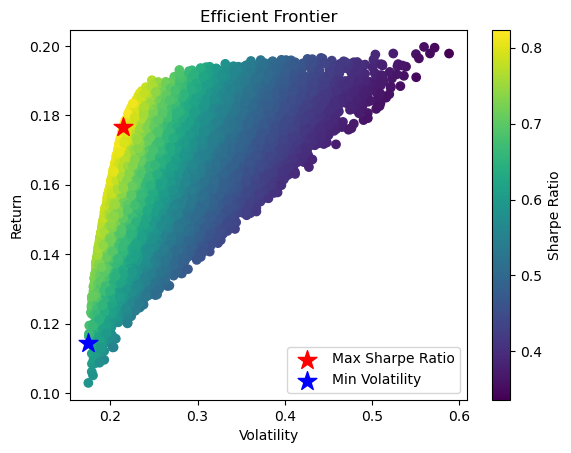

최대 샤프지수 포트폴리오
Return          0.176761
Volatility      0.214742
Sharpe Ratio    0.823131
TSLA            0.324416
AAPL            0.659664
JPM             0.000618
VOO             0.015302
Name: 14857, dtype: float64

최소 변동성 포트폴리오
Return          0.114307
Volatility      0.174762
Sharpe Ratio    0.654074
TSLA            0.012151
AAPL            0.141734
JPM             0.003627
VOO             0.842488
Name: 46401, dtype: float64


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 주식 데이터를 다운로드
tickers = ['TSLA', 'AAPL', 'JPM', 'VOO']
data = yf.download(tickers, start="2022-01-01", end="2024-12-31")['Close']

# 일일 수익률 계산
returns = data.pct_change().dropna()

# 시뮬레이션 횟수
num_simulations = 50000
num_assets = len(tickers)

# 결과를 저장할 배열 초기화
results = np.zeros((3 + num_assets, num_simulations))

# 몬테카를로 시뮬레이션 실행
for i in range(num_simulations):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # 포트폴리오 수익률과 변동성 계산
    portfolio_return = np.sum(returns.mean() * weights * 252)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_std_dev
    
    # 결과 저장
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio
    for j in range(len(weights)):
        results[3 + j, i] = weights[j]

# 결과 배열을 데이터프레임으로 변환
results_frame = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'] + tickers)

# 샤프지수가 최대인 포트폴리오와 변동성이 최소인 포트폴리오 찾기
max_sharpe_port = results_frame.loc[results_frame['Sharpe Ratio'].idxmax()]
min_vol_port = results_frame.loc[results_frame['Volatility'].idxmin()]

# 효율적 경계 플롯
plt.scatter(results_frame['Volatility'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port['Volatility'], max_sharpe_port['Return'], color='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(min_vol_port['Volatility'], min_vol_port['Return'], color='blue', marker='*', s=200, label='Min Volatility')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.show()

# 결과 출력
print("최대 샤프지수 포트폴리오")
print(max_sharpe_port)
print("\n최소 변동성 포트폴리오")
print(min_vol_port)

In [3]:
# tem = [ test.values[0] for test in last_price_list ]

# tem = []
# for test in last_price_list:
#     value = test.values[0]  # Series 안에 있는 float 값만 꺼냄
#     tem.append(value)


NameError: name 'last_price_list' is not defined

In [25]:
import warnings
warnings.filterwarnings('ignore')

def monte_carlo_simulation(stock_ticker='005930.KS', stock_name='삼성전자 (Samsung)', 
                          months_back=18, num_simulations=100, simulation_days=60):
    """
    몬테카를로 시뮬레이션을 수행하는 함수
    
    Parameters:
    stock_ticker (str): 주식 티커 심볼
    stock_name (str): 주식 이름
    months_back (int): 과거 몇 개월 데이터를 가져올지
    num_simulations (int): 시뮬레이션 횟수
    simulation_days (int): 시뮬레이션할 일수
    
    Returns:
    tuple: (시뮬레이션 결과 데이터프레임, 마지막 예측 가격 리스트)
    """
    # 한글 폰트 설정 (그래프에서 한글 깨짐 방지)
    path = "c:/Windows/Fonts/malgun.ttf"  # Windows 기준 '맑은 고딕' 폰트 경로
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

    # 데이터 조회 기간 설정
    today = date.today()
    startD = today - relativedelta(months=months_back)
    endD = today

    # 주가 정보 다운로드
    stock_data = yf.download(stock_ticker, startD, endD)

    # 일간 수익률 계산 (종가 기준)
    returns = stock_data['Close'].pct_change()

    # 일간 수익률의 표준편차 = 변동성
    daily_vol = returns.std()

    df = pd.DataFrame()      # 시뮬레이션 결과 저장용 데이터프레임
    last_price = stock_data['Close'].iloc[-1]  # 마지막 종가
    last_price_list = []     # 마지막 예측 가격 저장 리스트

    # 시뮬레이션 시작
    for x in range(num_simulations):
        T = simulation_days  # 시뮬레이션 일수
        count = 0
        price_list = []

        # 첫 날 가격 = 마지막 종가 * 무작위 수익률 반영
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        # T일 동안 가격 시뮬레이션
        for y in range(T):
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        # 시뮬레이션 결과를 데이터프레임에 저장
        df[x] = price_list
        last_price_list.append(price_list[-1])

    # 시각화
    plt.figure(figsize=(12, 8))
    plt.plot(df)
    plt.title(f'{stock_name} 몬테카를로 시뮬레이션 ({num_simulations:,}회)')
    plt.xlabel('일수')
    plt.ylabel('주가')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return df, last_price_list
    

# 함수 사용 예시
# df, last_price_list = monte_carlo_simulation()

# # 주가 데이터 다운로드 및 시뮬레이션, 시각화를 위한 라이브러리들
# import yfinance as yf                     # 야후 파이낸스에서 주가 데이터 수집
# import pandas as pd                       # 데이터프레임 생성 및 처리
# from datetime import date                 # 오늘 날짜 계산
# from dateutil.relativedelta import relativedelta  # 월 단위 날짜 계산
# import numpy as np                        # 수치 계산, 랜덤 수 생성
# import matplotlib.pyplot as plt           # 시각화
# import matplotlib.font_manager as fm      # 폰트 설정
# from matplotlib import rc                 # matplotlib 설정

# def main():
#     # 한글 폰트 설정 (그래프에서 한글 깨짐 방지)
#     path = "c:/Windows/Fonts/malgun.ttf"  # Windows 기준 '맑은 고딕' 폰트 경로
#     font_name = fm.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)

#     # 데이터 조회 기간 설정 (오늘부터 18개월 전까지)
#     today = date.today()
#     startD = today - relativedelta(months=18)
#     endD = today

#     # 주가 정보 다운로드 (삼성전자)
#     stock_ticker = '005930.KS'
#     stock_name = '삼성전자 (Samsung)'
#     stock_data = yf.download(stock_ticker, startD, endD)

#     # 비트코인 등 다른 종목도 사용 가능 (주석 처리됨)
#     # stock_ticker = 'BTC-USD'
#     # stock_name = '비트코인 (BTC/USD)'    
#     # stock_data = yf.download(stock_ticker, startD, endD)

#     # 일간 수익률 계산 (종가 기준)
#     returns = stock_data['Close'].pct_change()

#     # 일간 수익률의 표준편차 = 변동성
#     daily_vol = returns.std()

#     NUM_SIMULATIONS = 10000  # 몬테카를로 시뮬레이션 횟수
#     df = pd.DataFrame()      # 시뮬레이션 결과 저장용 데이터프레임
#     last_price = stock_data['Close'].iloc[-1]  # 마지막 종가
#     last_price_list = []     # 마지막 예측 가격 저장 리스트

#     # 시뮬레이션 시작
#     for x in range(NUM_SIMULATIONS):
#         T = 60  # 시뮬레이션 일수 (약 3개월)
#         count = 0
#         price_list = []

#         # 첫 날 가격 = 마지막 종가 * 무작위 수익률 반영
#         price = last_price * (1 + np.random.normal(0, daily_vol))
#         price_list.append(price)

#         # 이후 T일 동안 주가 경로 생성
#         for y in range(T):
#             if count == 251:  # 최대 252일 (1년 영업일) 제한 (실제 영향 없음)
#                 break
#             # 전날 가격 * 무작위 수익률 반영
#             price = price_list[count] * (1 + np.random.normal(0, daily_vol))
#             price_list.append(price)
#             count += 1

#         # 각 시뮬레이션 결과를 데이터프레임에 열로 저장
#         df[x] = price_list

#         # 마지막 가격만 따로 리스트에 저장 (평균/분위수용)
#         last_price_list.append(price_list[-1])  # float 값으로 저장됨

#     # ❌ 오류 발생 가능 코드: float에 `.values[0]`은 사용할 수 없음
#     # tem = [ test.values[0] for test in last_price_list ] ← 이건 Series일 때만 가능
#     # ✅ 아래처럼 고치면 됨:
#     tem = last_price_list

#     # 시각화 시작
#     plt.figure(figsize=(12, 8))  # 전체 그래프 크기 설정

#     # 왼쪽: 시뮬레이션 경로, 오른쪽: 히스토그램
#     figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
#     figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

#     # 모든 시뮬레이션 경로 그래프
#     figL.plot(df)
#     figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price,2)}', fontsize=14)
#     figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
#     figL.set_ylabel('Price (USD or KRW)', fontsize=12)

#     # 마지막 가격 분포 히스토그램
#     figR.hist(tem, bins=20)

#     # 분위수 라인 추가 (10%, 90%)
#     figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
#     figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')

#     # 평균선 표시
#     str_mean = str(round(np.mean(tem), 2))
#     figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
#     figR.set_xlabel('Price (USD)', fontsize=12)
#     figR.set_ylabel('빈도 수', fontsize=12)
#     figR.legend()

#     # 레이아웃 조정 및 그래프 출력
#     plt.tight_layout()
#     plt.show()

# # main 함수 실행
# main()

In [26]:
# 필요한 라이브러리 임포트
import yfinance as yf                         # 야후 파이낸스에서 주가 데이터를 불러오는 라이브러리
import pandas as pd                           # 데이터프레임 처리용
from datetime import date                     # 오늘 날짜를 얻기 위한 모듈
from dateutil.relativedelta import relativedelta  # 날짜 연산용 (ex. 18개월 전 계산)
import numpy as np                            # 수치 계산용
import matplotlib.pyplot as plt               # 그래프 시각화용
import matplotlib.font_manager as fm          # 한글 폰트 설정용
from matplotlib import rc                     # 그래프에서 폰트 적용을 위한 rc 설정
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 함수
def set_korean_font():
    path = "c:/Windows/Fonts/malgun.ttf"      # Windows에서 '맑은 고딕' 폰트 경로
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)              # matplotlib에서 사용할 폰트로 설정

# 주가 데이터를 불러오는 함수 (기본: 최근 18개월)
def load_stock_data(ticker, months=18):
    today = date.today()
    startD = today - relativedelta(months=months)
    endD = today
    return yf.download(ticker, startD, endD)  # yfinance로 주가 다운로드

# 평균 수익률(mu)과 변동성(sigma) 계산
def calc_return_stats(stock_data):
    returns = stock_data['Close'].pct_change().dropna()  # 일간 수익률 계산
    mu = returns.mean()                                  # 평균 수익률
    sigma = returns.std()                                # 표준편차(변동성)
    return mu, sigma

# 기존 방식과 달리: 수익률 기반 반복 시뮬레이션 함수
def run_simulations(last_price, daily_vol, num_simulations=100, T=60):
    """
    간단한 수익률 기반으로 주가를 시뮬레이션하고,
    전체 경로와 마지막 가격 리스트를 반환
    """
    df = pd.DataFrame()
    last_price_list = []

    for x in range(num_simulations):
        count = 0
        price_list = []

        # 첫 날 가격 계산
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        for y in range(T):
            if count == 251:
                break
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        df[x] = price_list
        last_price_list.append(price_list[-1])

    return df, last_price_list

# 메인 함수: 실행 순서 정의
def main():
    df = pd.DataFrame()
    set_korean_font()
    stock_ticker = '005930.KS'
    stock_name = '삼성전자 (Samsung)'
    stock_data = load_stock_data(stock_ticker)
    mu, sigma = calc_return_stats(stock_data)
    last_price = stock_data['Close'].iloc[-1]
    

    # 🎯 기존 방식
    # price_paths = monte_carlo_simulation(last_price, mu, sigma)

    # ✅ 새 방식: run_simulations 이용
    price_df, last_price_list = run_simulations(last_price, sigma)  # sigma = daily_vol

    # 새 방식에 맞게 plot도 직접 수정
    today = date.today()
    plt.figure(figsize=(12, 8))
    figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
    figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

    # 시뮬레이션 경로 시각화
    figL.plot(price_df.iloc[:, :100], alpha=0.2)
    figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price, 2)}', fontsize=14)
    figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
    figL.set_ylabel('Price (USD or KRW)', fontsize=12)

    # 마지막 가격 히스토그램
    tem = [ test.values[0] for test in last_price_list ]
    figR.hist(tem, bins=20)
    figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
    figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
    str_mean = str(round(np.mean(tem), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    figR.set_xlabel('Price (USD)', fontsize=12)
    figR.set_ylabel('빈도 수', fontsize=12)
    figR.legend()

    plt.tight_layout()
    plt.show()

    
def simulate_poisson_event_returns(last_price_list, lambda_event=0.1, daily_vol=0.05):
    """
    포아송 분포로 이벤트 발생 여부 판단 후,
    이벤트 발생 시 주가 하락률을 정규분포로 시뮬레이션하여 기록
    """
    event_returns = []
    event_count = 0

    for price in last_price_list:
        event = np.random.poisson(lambda_event)
        if event == 1:
            event_count += 1
            simulated_return = np.random.normal(loc=0, scale=daily_vol)  # 수익률
            event_returns.append(simulated_return)

    return event_count, event_returns

# 🎯 포아송 이벤트 기반 주가 하락률 시뮬레이션
#################################################################
event_count, event_returns = simulate_poisson_event_returns(tem)

print("\n[📉 포아송 이벤트 발생 시 주가 하락률 분석]")
print(f"- 이벤트 발생 횟수: {event_count}")
if event_count > 0:
    print(f"- 평균 수익률: {np.mean(event_returns) * 100:.2f}%")
    print(f"- 최대 하락률: {min(event_returns) * 100:.2f}%")
        
    # 히스토그램 시각화
    plt.figure(figsize=(8, 4))
    plt.hist(np.array(event_returns) * 100, bins=30)
    plt.title("이벤트 발생 시 주가 변화율 분포 (%)")
    plt.xlabel("주가 수익률 (%)")
    plt.ylabel("빈도")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("- 이벤트가 발생하지 않았습니다.")

# main 함수 실행
main()

NameError: name 'tem' is not defined

[*********************100%***********************]  1 of 1 completed


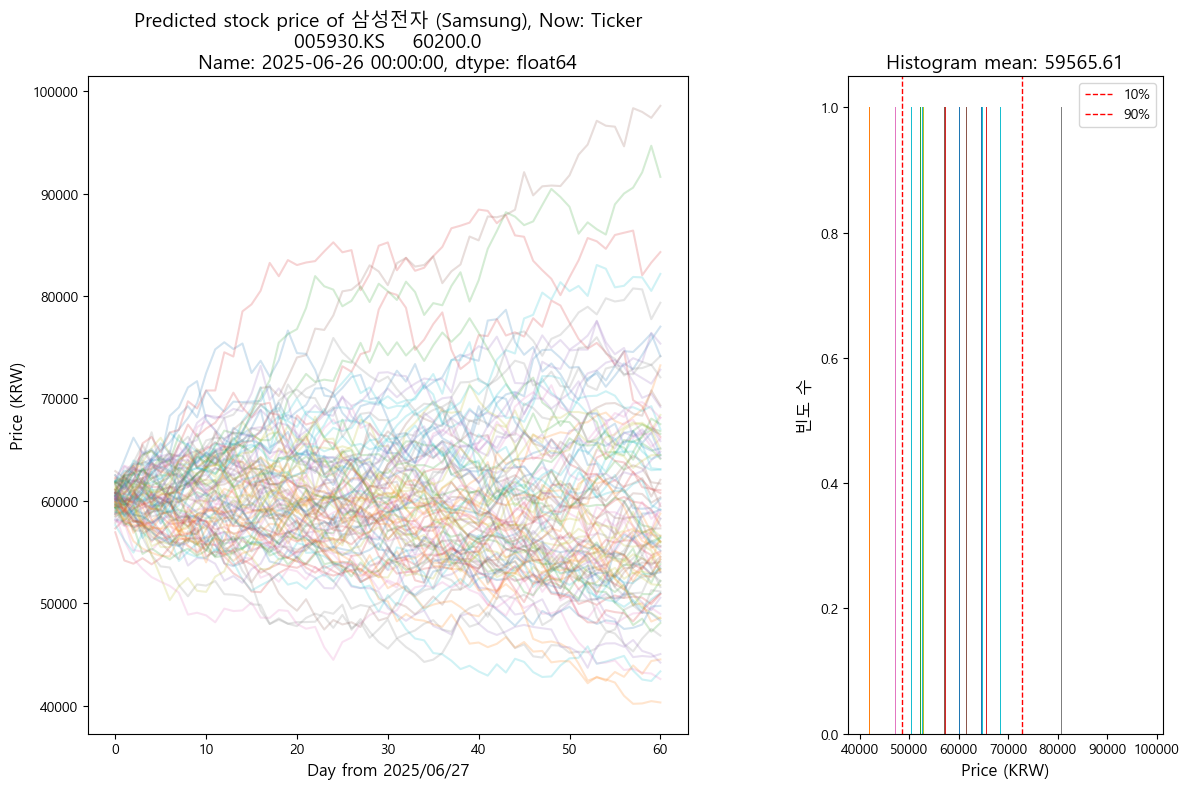


[📉 포아송 이벤트 발생 시 주가 하락률 분석]
- 이벤트 발생 횟수: 10
- 평균 수익률: 1.18%
- 최대 하락률: -2.75%


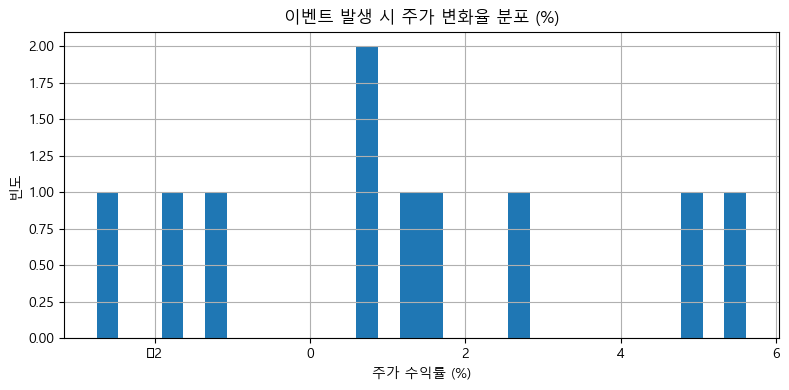

In [27]:
import yfinance as yf
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

# ✅ 한글 폰트 설정
def set_korean_font():
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

# ✅ 주가 데이터 불러오기
def load_stock_data(ticker, months=18):
    today = date.today()
    startD = today - relativedelta(months=months)
    endD = today
    return yf.download(ticker, startD, endD)

# ✅ 수익률 평균과 표준편차 계산
def calc_return_stats(stock_data):
    returns = stock_data['Close'].pct_change().dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# ✅ 몬테카를로 시뮬레이션
def run_simulations(last_price, daily_vol, num_simulations=100, T=60):
    df = pd.DataFrame()
    last_price_list = []

    for _ in range(num_simulations):
        count = 0
        price_list = []
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        for _ in range(T):
            price = price_list[count] * (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1

        df[len(df.columns)] = price_list
        last_price_list.append(price_list[-1])

    return df, last_price_list

# ✅ 포아송 이벤트 발생 시 수익률 시뮬레이션
def simulate_poisson_event_returns(last_price_list, lambda_event=0.1, daily_vol=0.05):
    event_returns = []
    event_count = 0

    for price in last_price_list:
        event = np.random.poisson(lambda_event)
        if event == 1:
            event_count += 1
            simulated_return = np.random.normal(loc=0, scale=daily_vol)
            event_returns.append(simulated_return)

    return event_count, event_returns

# ✅ 메인 함수
def main():
    set_korean_font()
    stock_ticker = '005930.KS'
    stock_name = '삼성전자 (Samsung)'
    stock_data = load_stock_data(stock_ticker)
    mu, sigma = calc_return_stats(stock_data)
    last_price = stock_data['Close'].iloc[-1]

    # 시뮬레이션 실행
    price_df, last_price_list = run_simulations(last_price, sigma)

    # 시각화 준비
    today = date.today()
    plt.figure(figsize=(12, 8))
    figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
    figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

    # 1) 주가 시뮬레이션 경로
    figL.plot(price_df.iloc[:, :100], alpha=0.2)
    figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price, 2)}', fontsize=14)
    figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
    figL.set_ylabel('Price (KRW)', fontsize=12)

    # 2) 마지막 가격 히스토그램
    tem = [price for price in last_price_list]
    figR.hist(tem, bins=20)
    figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
    figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
    str_mean = str(round(np.mean(tem), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    figR.set_xlabel('Price (KRW)', fontsize=12)
    figR.set_ylabel('빈도 수', fontsize=12)
    figR.legend()
    plt.tight_layout()
    plt.show()

    # ✅ 포아송 이벤트 발생 시 하락률 시뮬레이션
    event_count, event_returns = simulate_poisson_event_returns(tem)

    print("\n[📉 포아송 이벤트 발생 시 주가 하락률 분석]")
    print(f"- 이벤트 발생 횟수: {event_count}")
    if event_count > 0:
        print(f"- 평균 수익률: {np.mean(event_returns) * 100:.2f}%")
        print(f"- 최대 하락률: {min(event_returns) * 100:.2f}%")

        plt.figure(figsize=(8, 4))
        plt.hist(np.array(event_returns) * 100, bins=30)
        plt.title("이벤트 발생 시 주가 변화율 분포 (%)")
        plt.xlabel("주가 수익률 (%)")
        plt.ylabel("빈도")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("- 이벤트가 발생하지 않았습니다.")

# ✅ 실행
main()

In [4]:
import yfinance as yf
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

class StockSimulator:
    def __init__(self, ticker, months=18, num_simulations=1000, T=60):
        self.ticker = ticker
        self.months = months
        self.num_simulations = num_simulations
        self.T = T
        self.today = date.today()

        self.stock_data = None
        self.mu = None
        self.sigma = None
        self.last_price = None
        self.price_df = None
        self.last_price_list = None

        self.set_korean_font()
        self.load_data()
        self.calculate_stats()
        self.run_simulation()

    def set_korean_font(self):
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = fm.FontProperties(fname=path).get_name()
        rc('font', family=font_name)

    def load_data(self):
        startD = self.today - relativedelta(months=self.months)
        endD = self.today
        self.stock_data = yf.download(self.ticker, startD, endD)
        self.last_price = float(self.stock_data['Close'].iloc[-1])

    def calculate_stats(self):
        returns = self.stock_data['Close'].pct_change().dropna()
        self.mu = returns.mean()
        self.sigma = returns.std()

    def run_simulation(self):
        df = pd.DataFrame()
        last_price_list = []

        for _ in range(self.num_simulations):
            count = 0
            price_list = []
            price = self.last_price * (1 + np.random.normal(0, self.sigma))
            price_list.append(price)

            for _ in range(self.T):
                if count == 251:
                    break
                price = price_list[count] * (1 + np.random.normal(0, self.sigma))
                price_list.append(price)
                count += 1

            df[len(df.columns)] = price_list
            last_price_list.append(price_list[-1])

        self.price_df = df
        self.last_price_list = last_price_list

    def plot_simulation(self):
        plt.figure(figsize=(12, 8))
        figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
        figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

        # 경로 그래프
        figL.plot(self.price_df.iloc[:, :100], alpha=0.2)
        figL.set_title(f'{self.ticker} Monte Carlo Simulation\nStart Price: {round(self.last_price, 2)}', fontsize=14)
        figL.set_xlabel(f'Day from {self.today.strftime("%Y/%m/%d")}', fontsize=12)
        figL.set_ylabel('Price', fontsize=12)

        # 히스토그램
        figR.hist(self.last_price_list, bins=20)
        figR.axvline(np.percentile(self.last_price_list, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
        figR.axvline(np.percentile(self.last_price_list, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
        mean_value = np.mean(self.last_price_list)
        figR.set_title(f'Histogram mean: {round(mean_value, 2)}', fontsize=14)
        figR.set_xlabel('Price', fontsize=12)
        figR.set_ylabel('Frequency', fontsize=12)
        figR.legend()

        plt.tight_layout()
        plt.show()

    def print_summary(self):
        print(f"📈 종목: {self.ticker}")
        print(f"📅 분석 기간: 최근 {self.months}개월")
        print(f"💰 시작 가격: {round(self.last_price, 2)}")
        print(f"📊 평균 수익률 (mu): {round(self.mu, 6)}")
        print(f"📊 변동성 (sigma): {round(self.sigma, 6)}")
        print(f"🎯 마지막 날 가격 평균: {round(np.mean(self.last_price_list), 2)}")
        print(f"🎯 표준편차: {round(np.std(self.last_price_list), 2)}")



[*********************100%***********************]  1 of 1 completed


📈 종목: 005930.KS
📅 분석 기간: 최근 18개월
💰 시작 가격: 60200.0
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000445
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.019845
dtype: float64
🎯 마지막 날 가격 평균: 60362.18
🎯 표준편차: 9567.41


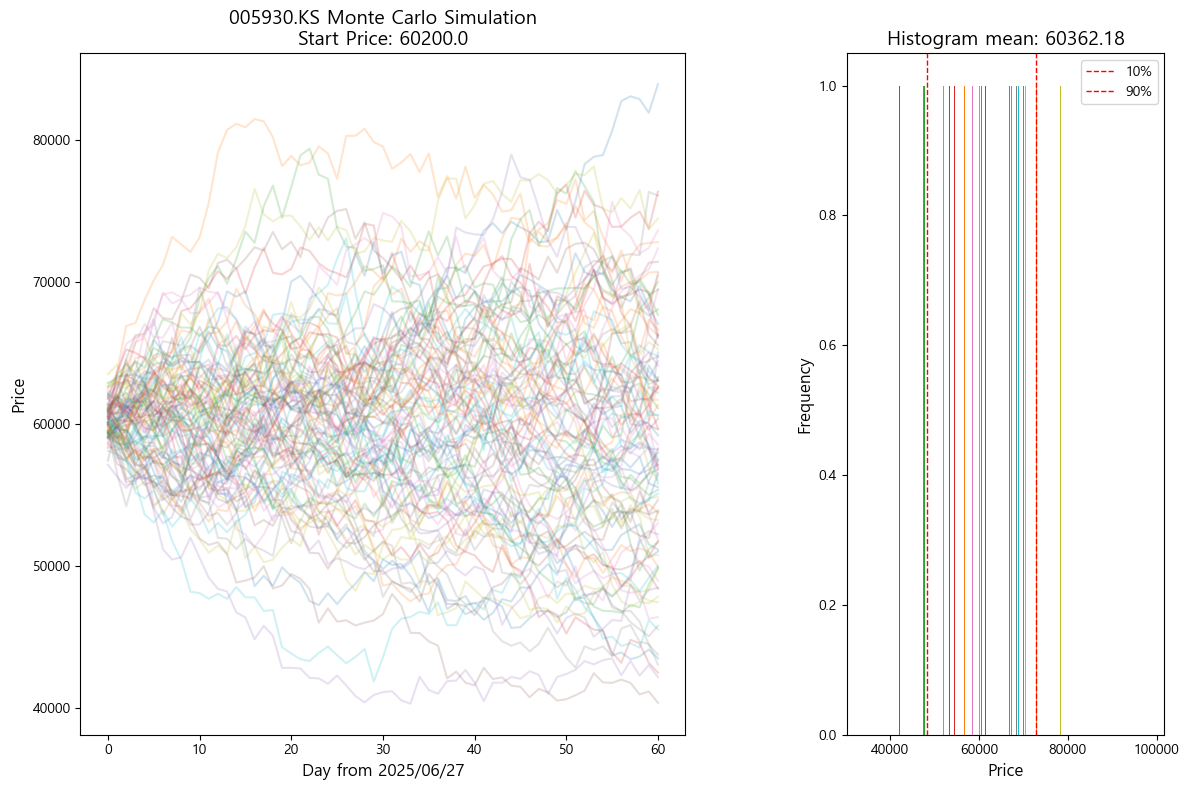

In [5]:
# 실행 예시
if __name__ == "__main__":
    ticker = '005930.KS'  # 예: 삼성전자
    simulator = StockSimulator(ticker)
    simulator.print_summary()
    simulator.plot_simulation()